In [7]:
import torch
from math import pi
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
%matplotlib inline

from dstft import DSTFT, FDSTFT, entropy_loss, fast_sst, frequency_tracking, sst2

device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(1802);

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
n = 1024
t = torch.arange(0, 1, 1/n)
phi1 = 282.5 * t 
phi2 = 240.5 * t
phi1prim = 282.5 * torch.ones_like(t)
phi2prim = 240.5 * torch.ones_like(t)
x = torch.exp(2j * pi * phi1) + torch.exp(2j*pi * phi2)

gamma = 0
sigma = 0.02
nfft = n

/home/maxime/mambaforge/envs/env/lib/python3.10/site-packages/torch/_tensor.py:972: ComplexWarning: Casting complex values to real discards the imaginary part
  return self.numpy().astype(dtype, copy=False)


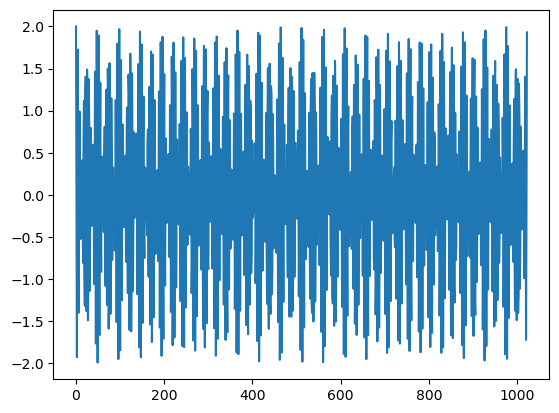

In [9]:
plt.plot(x)

In [10]:
dstft = FDSTFT(x, win_length=nfft, support=nfft, stride=nfft/10, win_requires_grad=False, stride_requires_grad=False, win_p=None, stride_p=None)
spec, stft = dstft(x)
dstft.print(spec, weights=False, wins=False, bar=True)

RuntimeError: maximum not implemented for complex tensors.

In [48]:
torch.exp(2j * torch.ones(5))

tensor([-0.4161+0.9093j, -0.4161+0.9093j, -0.4161+0.9093j, -0.4161+0.9093j,
        -0.4161+0.9093j])

In [49]:
stft, fsst, _, omega, _ = sst2(x, sigma, nfft, gamma)

1024


TypeError: zeros() received an invalid combination of arguments - got (list, dtype=builtin_function_or_method, device=torch.device), but expected one of:
 * (tuple of ints size, *, tuple of names names, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)
 * (tuple of ints size, *, Tensor out, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)
